<a href="https://colab.research.google.com/github/okcy58/AI2022/blob/main/Regular_Expression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regular Expression 모듈
- 정규 표현식(regular expression) 은 일종의 문자를 표현하는 공식
- **import re**
- re.compile('regular expression)
- method




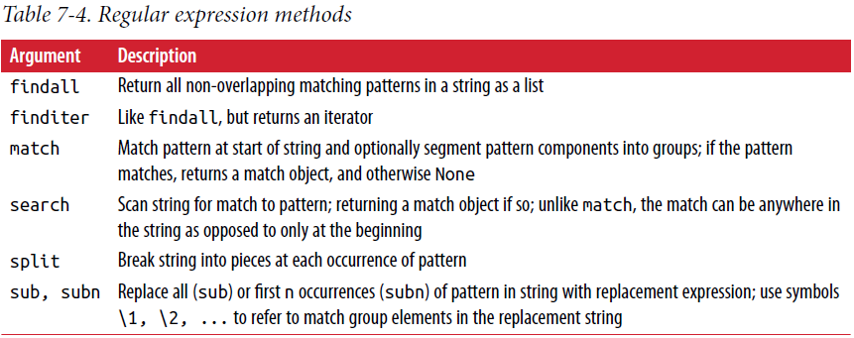

## regular expression 사용하지 않고 주민번호 뒤 7자리 * 처리

In [ ]:
data = """
park 800905-1049118
kim 700905-1059119
"""

result = []
for line in data.split("\n"):
    word_result = []
    for word in line.split(" "):
        if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
            word = word[:6] + "-" + "*******"
        word_result.append(word)
    result.append(" ".join(word_result))
print("\n".join(result))


park 800905-*******
kim 700905-*******



## regular expression 사용하여 주민번호 뒤 7자리 * 처리

In [ ]:
import re
data = """
park 800905-1049118
kim 700905-1059119
"""
pat = re.compile("(\d{6})[-]\d{7}")
print(pat.sub("\g<1>-*******", data))


park 800905-*******
kim 700905-*******



## 텍스트에서 pattern 찾기
- match(): 문자열의 처음에 특정 pattern 찾기
- search(): 문자열을 scan하여 특정 pattern 찾기

In [ ]:
import re
#pattern = 'this'
#text = 'Does this text match the pattern?'
pattern = '한글'
text = '문자 한글이 왜 과학적인가?'

m = re.match(pattern, text)
print("Mach :", m)
matched = re.search(pattern, text)
print("Search :", s)

Mach : None
Search : <_sre.SRE_Match object; span=(3, 5), match='한글'>


In [ ]:
s = matched.start()
e = matched.end()
print("Found '%s'\nin '%s'\nfrom %d tp %d ('%s')" \
      %(matched.re.pattern, matched.string, s, e, text[s:e]))

Found '한글'
in '문자 한글이 왜 과학적인가?'
from 3 tp 5 ('한글')


In [ ]:
dir(matched)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'end',
 'endpos',
 'expand',
 'group',
 'groupdict',
 'groups',
 'lastgroup',
 'lastindex',
 'pos',
 're',
 'regs',
 'span',
 'start',
 'string']

## 표현식 compile, compile()
- 자주 사용되는 표현식 컴파일해 둠

In [ ]:
import re
regexs = [re.compile(p) for p in ['this', 'that']]

text = 'Does this text match the pattern?'
print("Text: %s\n" % text)

for regex in regexs:
    print('Seeking "%s" => ' % regex.pattern, end=' ')
    if regex.search(text):
        print("match")
    else:
        print("no match")

Text: Does this text match the pattern?

Seeking "this" =>  match
Seeking "that" =>  no match


## 다중 matching
- findall()
- finditer()

In [ ]:
import re
text = 'abbaaabbbaaaaa'
pattern = 'ab'

for match in re.findall(pattern, text):
    print("found '%s'" % match)

In [ ]:
import re
text = 'abbaaabbbaaaaa'
pattern = 'ab'

for match in re.finditer(pattern, text):
    s = match.start()
    e = match.end()
    print("found '%s' at %d: %d" % (text[s:e], s, e))

## Pattern 문법
- Pattern 반복
- 위치, 범위 지정
- metacharacter: *, +, ?.
### greedy 탐색: 가능한 한 많은 입력값 소비 (최장일치)

In [ ]:
import re

def test_patterns(text, patterns=[]):
    """ text와 pattern list가 주어졌을 때, text 내에 일치되는 pattern 찾아 print"""
    for pattern, desc in patterns:
        print("Pattern %r (%s) \n" % (pattern, desc))
        print(" %r" % text)
        for match in re.finditer(pattern, text):
            s = match.start()
            e = match.end()
            substr = text[s:e]
            n_backslashes = text[:s].count('\\')
            prefix = '.'* (s+n_backslashes)
            print(" %s%r" % (prefix, substr))
        print()
    return()

In [ ]:
test_patterns(
    'abbaabbba',
    [('ab*',       'a followed by zero or more b'),
     ('ab+',       'a followed by one or more b'),
     ('ab?',       'a followed by zero or one b'),
     ('ab{3}',     'a followed by three b'),
     ('ab{2,3}',   'a followed by two to three b')
    ])

### ?: greedy 탐색 비활성화 (최단일치)

In [ ]:
test_patterns(
    'abbaabbba',
    [('ab*?',       'a followed by zero or more b'),
     ('ab+?',       'a followed by one or more b'),
     ('ab??',       'a followed by zero or one b'),
     ('ab{3}?',     'a followed by three b'),
     ('ab{2,3}?',   'a followed by two to three b')
    ])

### 문자 집합, [ ]
- 집합 속의 어느 문자라도 match
- 특정 문자 제외 [^ ]
- 문자 범위, [a-z]

In [ ]:
test_patterns(
    'abbaabbba',
    [('[ab]',       'either a or b'),
     ('a[ab]+',     'a followed by 1 or more a or b'),
     ('a[ab]+?',    'a followed by 1 or more a or b, not greedy'),
    ])

In [ ]:
test_patterns(
    'This is some text -- with punctuations.',
    [('[^-. ]+',  'sequences without "-, ., or space"')])

In [ ]:
test_patterns(
    'This is some text -- with punctuations.',
    [('[a-z]+',    'sequences of lowercase letters'),
     ('[A-Z]+',    'sequences of uppercase letters'),
     ('[a-zA-Z]+', 'sequences of lowercase or uppercase letters'),
     ('[A-Z][a-z]+', 'one uppercase followed by lowercase letters')
    ])

### '.': 임의의 문자 일치

In [ ]:
test_patterns(
    'abbaabbba',
    [ ('a.',    'a   followed by any one character'),
      ('b.',    'b   followed by any one character'),
      ('a.*b',  'a   followed by anything, ending in b'),
      ('a.*?b', 'a   followed by anything, ending in b')
    ])

### escape 문자
- \d : matches digits
- \D : matches not digits, [^0-9]
- \s : matches whitespaces, [ \t\n\r\f\v]
- \S : matches not whitespace
- \w : matches a word (alphanumeric characters), [a-zA-Z0-9]
- \W : matches not word , [^a-zA-Z0-9]

\* '\\'도 '\\\\'로 해야 하기 때문에 문자열 앞에 'r'을 붙임

In [ ]:
test_patterns(
    'A prime #12   example!',
    [ (r'\d+',    'sequence of digits'),
      (r'\D+',    'sequence of nondigits'),
      (r'\s+',    'sequence of whitespaces'),
      (r'\S+',    'sequence of notwhitespaces'),
      (r'\w+',    'alphanumeric characters'),
      (r'\W+',    'nonalphanumeric')
    ])

In [ ]:
test_patterns(
    r'\d+ \D+ \s+',
    [ (r'\\.\+', 'escape code') ])

### 위치 지정
- ^ : 문자열이나 줄의 시작
- $ : 문자열이나 줄의 끝
- \A : 문자열의 시작
- \Z : 문자열의 끝
- \b : 단어의 시작이나 끝에 있는 공백 문자열
- \B : 단어의 시작이나 끝에 있지 않는 공백 문자열

In [ ]:
test_patterns(
    'This is some text -- with punctuations.',
    [(r'^\w+',      'word at start of string'),
     (r'\A\w+',     'word at start of string'),
     (r'\w+\S*$',   'word near end of string, skip punctuation'),
     (r'\w+\S*\Z',  'word near end of string, skip punctuation'),
     (r'\w*t\w*',   'word containging "t"'),
     (r'\bt\w+',    't at start of word'),
     (r'\w+t\b',    't at end of word'),
     (r'\Bt\B',     't, not start or end of word')
    ])

## 검색 범위 제한, search()

In [ ]:
import re

text = 'This is some text -- with punctuations.'
pattern = re.compile(r'\b\w*is\w*\b')

print("Text: ", text)
print()

pos = 0
while True:
    match = pattern.search(text, pos)
    if not match:
        break
    s = match.start()
    e = match.end()
    print(" %2d : %2d = '%s'" % (s, e-1, text[s:e]))
    pos = e

## group을 이용한 matching 분리
- group을 표현하는 정규식: ()에 표현
- group(): 한 group의 내용만 접근
- groups(): 매칭된 pattern의 내부 group에 개별적으로 접근

In [ ]:
test_patterns(
    'abbaabbbbaaaaa',
    [ ('a(ab)',    'a followed by literal ab'),
      ('a(a*b*)',  'a followed by 0-n a and 0-n b'),
      ('a(ab)*',   'a followed by 0-n ab'),
      ('a(ab)+',   'a followed by 1-n ab')
    ])

In [ ]:
import re

text = 'This is some text -- with punctuations.'

print(text)
print()

patterns = [
    (r'^(\w+)',  'word at start of string'),
    (r'(\w+)\S*$',  'word at end, with optional punctuation'),
    (r'(\bt\w+)\W+(\w+)',  'word at start with t, another word'),
    (r'(\w+t)\b',  'word ending with t')
]

for pattern, desc in patterns:
    regex = re.compile(pattern)
    match = regex.search(text)
    print("Pattern %r (%s)\n" % (pattern, desc))
    print("   ", match.groups())
    print()

In [ ]:
import re

text = 'This is some text -- with punctuations.'

print("Input text             :", text)

regex = re.compile(r'(\bt\w+)\W+(\w+)')             # group(1): (\bt\w+), group(2): (\w+)
print("Pattern                :", regex.pattern)

match = regex.search(text)
print("Entire match           :", match.group(0))   # matching된 문자영 전체
print("Word starting with 't' :", match.group(1))   # matching된 첫번째 group
print("Word after 't' word    :", match.group(2))   # matching된 두번째 group

### group에 이름 붙이기
```
  (?P<name>pattern)
```
- groupdict(): group 이름에 대응되는 matching된 문자열을 dictionary 형태로 추출

In [ ]:
import re

text = 'This is some text -- with punctuations.'

print("Input text             :", text)

patterns = [
    r'^(?P<first_name>\w+)',
    r'(?P<last_name>\w+)\S*$',
    r'(?P<t_word>\bt\w+)\W+(?P<other_word>\w+)',
    r'(?P<ends_with_t>\w+t)\b'
]
for pattern in patterns:
    regex = re.compile(pattern)
    match = regex.search(text)
    print("Maching '%s'" % pattern)
    print("   ", match.groups())
    print("   ", match.groupdict())
    print()

## 검색 option
- 대소문자 구별하지 않는 matching
- 다중 라인 입력
- unicode
- verbose 표현식
- pattern에 flag 넣기

### 대소문자 구별하지 않는 matching, IGNORECASE

In [ ]:
import re

text = 'This is some text -- with punctuation.'
pattern = r'\bT\w+'
with_case = re.compile(pattern)
without_case = re.compile(pattern, re.IGNORECASE)

print('Text:\n  %r' % text)
print('Pattern:\n  %s' % pattern)
print('Case-sensitive:')
for match in with_case.findall(text):
    print('  %r' % match)
print('Case-insensitive:')
for match in without_case.findall(text):
    print('  %r' % match)

### 다중 라인 입력
- MULTILINE: ^와 $는 각 줄의 시작과 끝에 적용
- DOTALL: '.'는 줄바꿈 문자도 포함하여 매칭(일반적으로는 줄바꿈 제외)

In [ ]:
import re

text = """This is some text -- with punctuation.
A second line."""
pattern = r'(^\w+)|(\w+\S*$)'
single_line = re.compile(pattern)
multiline = re.compile(pattern, re.MULTILINE)

print('Text:\n  %r' % text)
print('Pattern:\n  %s' % pattern)
print('Single Line :')
for match in single_line.findall(text):
    print('  %r' % (match,))
print('Multline    :')
for match in multiline.findall(text):
    print('  %r' % (match,))

In [ ]:
import re

text = """This is some text -- with punctuation.
A second line."""
pattern = r'.+'
no_newlines = re.compile(pattern)
dotall = re.compile(pattern, re.DOTALL)

print ('Text:\n  %r' % text)
print ('Pattern:\n  %s' % pattern)
print ('No newlines :')
for match in no_newlines.findall(text):
    print ('  %r' % match)
print ('Dotall      :')
for match in dotall.findall(text):
    print ('  %r' % match)

## 실습
- UCorpus 원문장, 태깅문장 별도 추출
- NNG만 추출 (ETM NNB 패턴 추출), sorting
- 한글제외한 문자 제거
- 특정 패턴 (첫글자, 중간글자, 끝글자, 조합)